In [33]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

In [34]:
# load hourly data
data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter01/data/hour.csv')

In [35]:
# create new column by encoding the weathersit one
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
data['weather'] = data['weathersit']\
    .apply(lambda x: weather_mapping[x])

In [36]:
# define a function for creating a regression plot for a specified weather condition
def create_regression_plot(data, col, weather_cond):
    # extract data for the specific weather condition
    plot_data = data[data['weather'] == weather_cond]

    # create regplot for registered users
    ax = sns.regplot(x=col, y="registered", data=plot_data, \
                     scatter_kws={"alpha":0.05})
    
    # create regplot for casual users
    ax = sns.regplot(x=col, y="casual", data=plot_data, \
                     scatter_kws={"alpha":0.05})
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"{col} | {weather_cond}")
    return ax

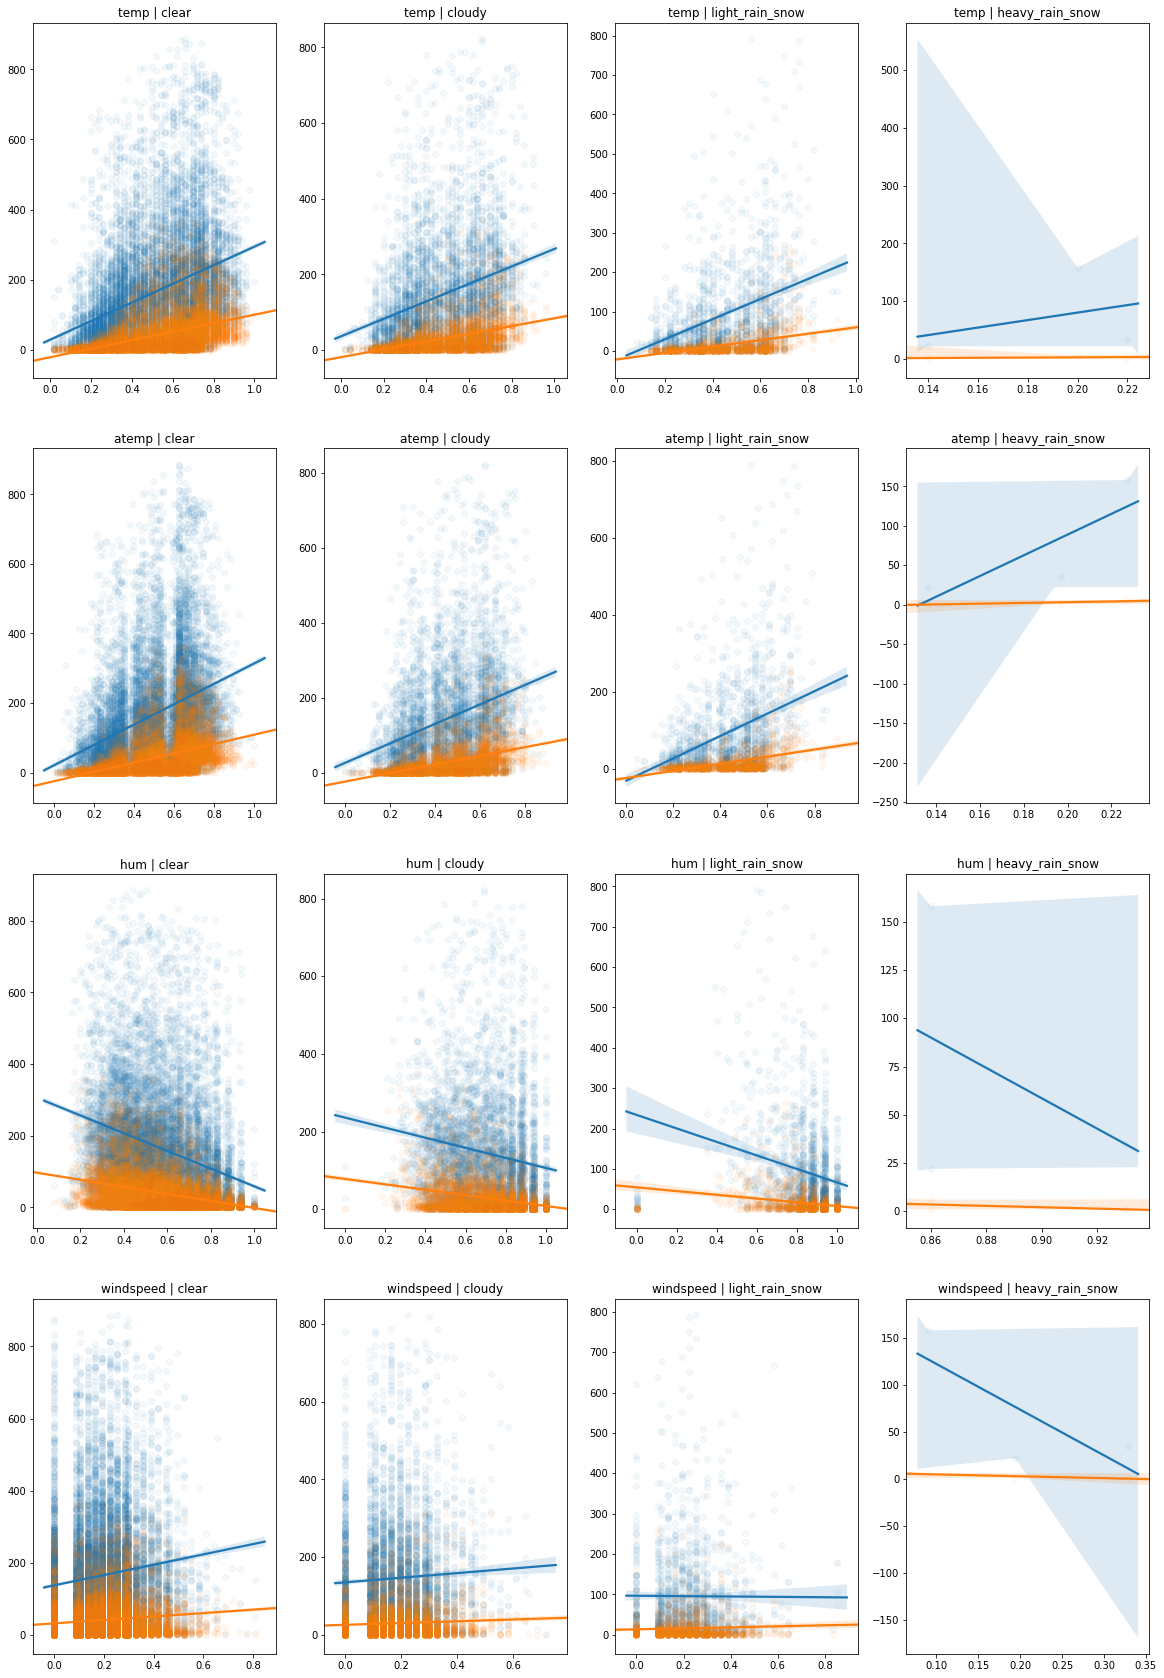

In [37]:
# create 4 by 4 regplots with columns and weather conditions
weather_conditions = data.weather.unique()
columns = ["temp", "atemp", "hum", "windspeed"]

plt.figure(figsize=(20,30))
for col_index, col in enumerate(columns):
    for row_index, weather_cond in enumerate(weather_conditions):
        plot_number = row_index + col_index*4 + 1
        plt.subplot(4,4,plot_number)
        create_regression_plot(data, col, weather_cond)

In [38]:
# create function for computing pearson correlation
def print_correlations(data, col, weather_cond):
    # extract data for the specific weather condition
    corr_data = data[data['weather'] == weather_cond]
    
    # compute pearson correlation between col and registered rides
    pearson_corr_r = pearsonr(corr_data[col], corr_data["registered"])
    
    # compute pearson correlation between col and registered rides
    pearson_corr_c = pearsonr(corr_data[col], corr_data["casual"])
    
    # print correlations
    print(f"Pearson correlation (registered, {col}): corr={pearson_corr_r[0]:.03f}, pval={pearson_corr_r[1]:.03f}")
    print(f"Pearson correlation (casual, {col}): corr={pearson_corr_c[0]:.03f}, pval={pearson_corr_c[1]:.03f}")


In [39]:
# print correlations for temp, atemp, hum and windspeed columns 
# with registered and casual rides
weather_conditions = data.weather.unique()
columns = ["temp", "atemp", "hum", "windspeed"]

for col in columns:
    for weather_cond in weather_conditions:
        print_correlations(data, col, weather_cond)

Pearson correlation (registered, temp): corr=0.340, pval=0.000
Pearson correlation (casual, temp): corr=0.459, pval=0.000
Pearson correlation (registered, temp): corr=0.285, pval=0.000
Pearson correlation (casual, temp): corr=0.437, pval=0.000
Pearson correlation (registered, temp): corr=0.356, pval=0.000
Pearson correlation (casual, temp): corr=0.433, pval=0.000
Pearson correlation (registered, temp): corr=0.360, pval=0.766
Pearson correlation (casual, temp): corr=0.277, pval=0.821
Pearson correlation (registered, atemp): corr=0.334, pval=0.000
Pearson correlation (casual, atemp): corr=0.451, pval=0.000
Pearson correlation (registered, atemp): corr=0.285, pval=0.000
Pearson correlation (casual, atemp): corr=0.434, pval=0.000
Pearson correlation (registered, atemp): corr=0.366, pval=0.000
Pearson correlation (casual, atemp): corr=0.445, pval=0.000
Pearson correlation (registered, atemp): corr=0.810, pval=0.399
Pearson correlation (casual, atemp): corr=0.756, pval=0.454
Pearson correlat